## Data Preprocessing

In [410]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv(r'C:\Users\Vivek\Desktop\HighRadius_project\H2HBABBA2413.csv')

In [411]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200763814,SYSCO F associates,2020-01-24 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200123.0,USD,RV,1.0,NaN,23418.25,20200108.0,NAA8,1.930372e+09,0
1,U001,0200769623,WAL-MAR corp,2019-10-16 00:00:00,2019.0,1.929973e+09,2019-10-06,20191005,20191006,20191021.0,USD,RV,1.0,NaN,14109.62,20191006.0,NAH4,1.929973e+09,0
2,U001,0200707822,PUBLI associates,2019-02-15 00:00:00,2019.0,1.928719e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,1.0,NaN,102953.36,20190131.0,NAA8,1.928719e+09,0
3,U001,0200416837,DEC in,2019-10-23 00:00:00,2019.0,1.930041e+09,2019-10-22,20191022,20191022,20191023.0,USD,RV,1.0,NaN,19783.60,20191016.0,NAM1,1.930041e+09,0
4,U001,0200762301,C&S WH corporation,2019-05-01 00:00:00,2019.0,1.929148e+09,2019-04-16,20190415,20190416,20190501.0,USD,RV,1.0,NaN,18780.73,20190416.0,NAC6,1.929148e+09,0


In [412]:
df.shape

(50000, 19)

In [413]:
#drop columns having same values in whole dataset
unique_cols = [x for x in df.columns if df[x].nunique()==1]
print(unique_cols)
df.drop(unique_cols, axis = 1, inplace = True)
df.columns

['posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [414]:
df.drop_duplicates(keep = 'first', inplace = True)

In [415]:
#gives columns with number of rows with null values
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9711
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
area_business             48832
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [416]:
#drop duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

In [417]:
#check duplicate features
duplicated_features = [x for x in df.columns if x not in df.columns]
duplicated_features

[]

####  Store dataset with clear_date =  null values and not null separately

In [612]:
train_data = df[df['clear_date'].notnull()]
Test = df[df['clear_date'].isnull()]

In [502]:
Test.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9711
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
area_business             9711
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [503]:
#Sort dataset on basis of posting date
train_data.sort_values(by = ['posting_date'])
train_data.reset_index()

,index,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,0,U001,0200763814,SYSCO F associates,2020-01-24 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200123.0,USD,RV,NaN,23418.25,20200108.0,NAA8,1.930372e+09,0
1,1,U001,0200769623,WAL-MAR corp,2019-10-16 00:00:00,2019.0,1.929973e+09,2019-10-06,20191005,20191006,20191021.0,USD,RV,NaN,14109.62,20191006.0,NAH4,1.929973e+09,0
2,2,U001,0200707822,PUBLI associates,2019-02-15 00:00:00,2019.0,1.928719e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,NaN,102953.36,20190131.0,NAA8,1.928719e+09,0
3,3,U001,0200416837,DEC in,2019-10-23 00:00:00,2019.0,1.930041e+09,2019-10-22,20191022,20191022,20191023.0,USD,RV,NaN,19783.60,20191016.0,NAM1,1.930041e+09,0
4,4,U001,0200762301,C&S WH corporation,2019-05-01 00:00:00,2019.0,1.929148e+09,2019-04-16,20190415,20190416,20190501.0,USD,RV,NaN,18780.73,20190416.0,NAC6,1.929148e+09,0
5,6,U001,0200744019,TARG,2019-08-27 00:00:00,2019.0,1.929737e+09,2019-08-13,20190812,20190813,20190828.0,USD,RV,NaN,42345.51,20190813.0,NAA8,1.929737e+09,0
6,7,U001,0200769623,WAL-MAR,2019-11-06 00:00:00,2019.0,1.930051e+09,2019-10-25,20191025,20191025,20191109.0,USD,RV,NaN,20494.48,20191025.0,NAH4,1.930051e+09,0
7,8,U001,0100000222,SMITHFIE in,2020-03-02 00:00:00,2020.0,1.930543e+09,2020-02-19,20200219,20200219,20200305.0,USD,RV,NaN,31080.13,20200219.0,NAA8,1.930543e+09,0
8,9,U001,0200704858,WAKE corp,2019-10-07 00:00:00,2019.0,1.929915e+09,2019-09-25,20190924,20190925,20191010.0,USD,RV,NaN,225731.20,20190925.0,NAA8,1.929915e+09,0
9,10,U001,0200759878,SA foundation,2019-06-11 00:00:00,2019.0,1.929257e+09,2019-05-05,20190504,20190505,20190619.0,USD,RV,NaN,111565.94,20190505.0,NAWP,1.929257e+09,0


#### Filtering unecessary features

In [504]:
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200763814,SYSCO F associates,2020-01-24 00:00:00,2020.0,1.930372e+09,2020-01-08,20200108,20200108,20200123.0,USD,RV,NaN,23418.25,20200108.0,NAA8,1.930372e+09,0
1,U001,0200769623,WAL-MAR corp,2019-10-16 00:00:00,2019.0,1.929973e+09,2019-10-06,20191005,20191006,20191021.0,USD,RV,NaN,14109.62,20191006.0,NAH4,1.929973e+09,0
2,U001,0200707822,PUBLI associates,2019-02-15 00:00:00,2019.0,1.928719e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,NaN,102953.36,20190131.0,NAA8,1.928719e+09,0
3,U001,0200416837,DEC in,2019-10-23 00:00:00,2019.0,1.930041e+09,2019-10-22,20191022,20191022,20191023.0,USD,RV,NaN,19783.60,20191016.0,NAM1,1.930041e+09,0
4,U001,0200762301,C&S WH corporation,2019-05-01 00:00:00,2019.0,1.929148e+09,2019-04-16,20190415,20190416,20190501.0,USD,RV,NaN,18780.73,20190416.0,NAC6,1.929148e+09,0


In [505]:
drop_list = ['name_customer', 'posting_date','document_create_date','invoice_id','isOpen','document type','area_business','doc_id']
train_data = train_data.drop(columns = drop_list)

In [506]:
list(train_data.columns)

['business_code',
 'cust_number',
 'clear_date',
 'buisness_year',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

#### Split data in two parts 'df_train' and 'df_test' dataset

In [507]:
df_train, df_test = train_test_split(train_data, test_size = 
                                                .30, shuffle = False, random_state = 5)
df_train.shape, df_test.shape

((27384, 10), (11737, 10))

####   Ensure no null values left 

In [508]:
null_columns = df_train.isnull().sum()
null_columns

business_code             0
cust_number               0
clear_date                0
buisness_year             0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64

In [509]:
null_columns = df_test.isnull().sum()
null_columns

business_code             0
cust_number               0
clear_date                0
buisness_year             0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64

In [510]:
#looking for duplicate columns
data_T = df_train.T
data_T.duplicated()

business_code             False
cust_number               False
clear_date                False
buisness_year             False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
dtype: bool

In [511]:
#copy dataset for backup purpose
df_train1 = df_train.copy()
df_test1 = df_test.copy()

## Feature Engineering/Feature Generation

In [512]:
df_train['buisness_year'].unique()

array([2020., 2019.])

In [513]:
df_train['cust_number'].unique()

array(['0200763814', '0200769623', '0200707822', ..., '0200983712',
       '0140102142', '0200138417'], dtype=object)

In [514]:
df_train['cust_payment_terms'].unique()

array(['NAA8', 'NAH4', 'NAM1', 'NAC6', 'NAWP', 'CA10', 'NAG2', 'NAX2',
       'NA32', 'NAVQ', 'NAD1', 'NAAX', 'NAD5', 'NAVE', 'NAM4', 'NAU5',
       'NA10', 'NAVR', 'NAM2', 'NAGD', 'NAVF', 'NA84', 'NAWN', 'NA31',
       'NAWU', '90M7', 'NA38', 'NAAW', 'NACB', 'CA30', 'NAUZ', 'NANC',
       'NA9X', 'NA25', 'NA3F', 'NATU', 'NA8Q', 'NAVL', 'NAD4', 'NAB1',
       'NA3B', 'NABG', 'C106', 'NAD8', 'NATW', 'NAVM', 'NAUI', 'NAV9',
       'CAB1', 'NAVC', 'NAVD', 'BR12', 'NAWM', 'NAM3', 'NATK', 'NAUP',
       'NAUN', 'NACE', 'NATJ', 'NATM', 'CA60', 'B052', 'BR56', 'NATZ',
       'CAX2'], dtype=object)

In [515]:
df_train['invoice_currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [516]:
df_train.head()

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200763814,2020-01-24 00:00:00,2020.0,20200108,20200123.0,USD,23418.25,20200108.0,NAA8
1,U001,0200769623,2019-10-16 00:00:00,2019.0,20191006,20191021.0,USD,14109.62,20191006.0,NAH4
2,U001,0200707822,2019-02-15 00:00:00,2019.0,20190131,20190215.0,USD,102953.36,20190131.0,NAA8
3,U001,0200416837,2019-10-23 00:00:00,2019.0,20191022,20191023.0,USD,19783.60,20191016.0,NAM1
4,U001,0200762301,2019-05-01 00:00:00,2019.0,20190416,20190501.0,USD,18780.73,20190416.0,NAC6


 #### Label Encoding to categorical features

In [517]:
#Label Encoding of 'business_code'
business_code_encoder = LabelEncoder()
business_code_encoder.fit(df_train['business_code'])
df_train['business_code_enc'] = business_code_encoder.transform(df_train['business_code'])
business_code_encoder.fit(df_test['business_code'])
df_test['business_code_enc'] = business_code_encoder.transform(df_test['business_code'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [518]:
#Label Encoding of 'cust_number'
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(df_train['cust_number'])
df_train['cust_number_enc'] = cust_number_encoder.transform(df_train['cust_number'])
cust_number_encoder.fit(df_test['cust_number'])
df_test['cust_number_enc'] = cust_number_encoder.transform(df_test['cust_number'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [519]:
#Label Encoding of 'buisness_year'
buisness_year_encoder = LabelEncoder()
buisness_year_encoder.fit(df_train['buisness_year'])
df_train['buisness_year_enc'] = buisness_year_encoder.transform(df_train['buisness_year'])
df_test['buisness_year_enc'] = buisness_year_encoder.transform(df_test['buisness_year'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [520]:
#Label Encoding of 'cust_payment'
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(df_train['cust_payment_terms'])
df_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(df_train['cust_payment_terms'])
cust_payment_terms_encoder.fit(df_test['cust_payment_terms'])
df_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(df_test['cust_payment_terms'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [521]:
#Label Encoding of 'invoice_currency'
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(df_train['invoice_currency'])
df_train['invoice_currency_enc'] = invoice_currency_encoder.transform(df_train['invoice_currency'])
invoice_currency_encoder.fit(df_test['invoice_currency'])
df_test['invoice_currency_enc'] = invoice_currency_encoder.transform(df_test['invoice_currency'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [522]:
#Drop Label Encoded features
drop_list = ['buisness_year','cust_number','cust_payment_terms','invoice_currency','business_code']
df_train = df_train.drop(columns = drop_list, axis = 1)
df_test = df_test.drop(columns = drop_list, axis = 1)

In [523]:
df_train.head()

,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,business_code_enc,cust_number_enc,buisness_year_enc,cust_payment_terms_enc,invoice_currency_enc
0,2020-01-24 00:00:00,20200108,20200123.0,23418.25,20200108.0,1,707,1,20,1
1,2019-10-16 00:00:00,20191006,20191021.0,14109.62,20191006.0,1,718,0,34,1
2,2019-02-15 00:00:00,20190131,20190215.0,102953.36,20190131.0,1,590,0,20,1
3,2019-10-23 00:00:00,20191022,20191023.0,19783.60,20191016.0,1,477,0,35,1
4,2019-05-01 00:00:00,20190416,20190501.0,18780.73,20190416.0,1,701,0,25,1


#### Date-Time Conversion

In [524]:
#Removing 'NULL' values from datetime dataframe
def str_to_date(time_s,st):
    st=''
    for i in range(len(time_s)+3):
        if(i<4):
            st+=time_s[i]
        if(i==4):
            st+='-'
        if(i==5 or i==6):
            st+= time_s[i-1]
        if(i==7):
            st+='-'
        if(i==8 or i==9):
            st+=time_s[i-2]
    return st

In [525]:
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

st = ''
df_train['baseline_create_date'] = pd.Series(df_train['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
df_train['due_in_date'] = pd.Series(df_train['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
df_train['document_create_date.1'] = pd.Series(df_train['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [526]:
st = ''
df_test['baseline_create_date'] = pd.Series(df_test['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
df_test['due_in_date'] = pd.Series(df_test['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
df_test['document_create_date.1'] = pd.Series(df_test['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [527]:
df_train.head()

,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,business_code_enc,cust_number_enc,buisness_year_enc,cust_payment_terms_enc,invoice_currency_enc
0,2020-01-24 00:00:00,2020-01-08,2020-01-23,23418.25,2020-01-08,1,707,1,20,1
1,2019-10-16 00:00:00,2019-10-06,2019-10-21,14109.62,2019-10-06,1,718,0,34,1
2,2019-02-15 00:00:00,2019-01-31,2019-02-15,102953.36,2019-01-31,1,590,0,20,1
3,2019-10-23 00:00:00,2019-10-22,2019-10-23,19783.60,2019-10-16,1,477,0,35,1
4,2019-05-01 00:00:00,2019-04-16,2019-05-01,18780.73,2019-04-16,1,701,0,25,1


In [528]:
#for df_train dataset
date_list = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

for col in date_list:
    df_train[col] = pd.to_datetime(df_train[col],format='%Y-%m-%d')
df_train.shape

(27384, 10)

In [529]:
#for df_test dataset
date_list = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

for col in date_list:
    df_test[col] = pd.to_datetime(df_test[col],format='%Y-%m-%d')
df_test.shape

(11737, 10)

###### Drop the columns where invoice document created before baseline creation date 

In [530]:
temp = pd.Series(df_train['document_create_date.1'] - df_train['baseline_create_date']).dt.days

In [531]:
rows_to_drop = temp.value_counts()

In [532]:
# No. of rows to drop 
rows_to_drop[(rows_to_drop.index <0)].sum()

1850

In [533]:
df_train = df_train[((temp==0) | (temp>0))].reset_index(drop = True)

In [534]:
#Now 'document_create_date.1' is useless
df_train = df_train.drop(columns = ['document_create_date.1'])
df_test = df_test.drop(columns = ['document_create_date.1'])

In [535]:
df_train.columns

Index(['clear_date', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'business_code_enc', 'cust_number_enc',
       'buisness_year_enc', 'cust_payment_terms_enc', 'invoice_currency_enc'],
      dtype='object')

In [536]:
list_dates = ['due_in_date','baseline_create_date']
#payment date is excluded

#### Delay calculation

In [537]:
df_train['payment_timeperiod'] = pd.Series(df_train['clear_date'] - df_train['baseline_create_date']).dt.days
df_train['due_timeperiod'] = pd.Series(df_train['due_in_date'] - df_train['baseline_create_date']).dt.days
df_train['delay'] = df_train['payment_timeperiod'] - df_train['due_timeperiod']

df_test['payment_timeperiod'] = pd.Series(df_test['clear_date'] - df_test['baseline_create_date']).dt.days
df_test['due_timeperiod'] = pd.Series(df_test['due_in_date'] - df_test['baseline_create_date']).dt.days
df_test['delay'] = df_test['payment_timeperiod'] - df_test['due_timeperiod']

##### Feature generation from datetime formatted dataset

In [538]:
for col1 in ['baseline_create_date','due_in_date']:
    df_train['{}.day'.format(col1)]=df_train[col1].dt.day
    df_train['{}.year'.format(col1)]=df_train[col1].dt.year
    df_train['{}.month'.format(col1)]=df_train[col1].dt.month
    df_test['{}.day'.format(col1)]=df_test[col1].dt.day
    df_test['{}.year'.format(col1)]=df_test[col1].dt.year
    df_test['{}.month'.format(col1)]=df_test[col1].dt.month

In [539]:
#sort dataset on basis of customer number
df_train = df_train.sort_values(['baseline_create_date']).reset_index(drop=True)
df_test = df_test.sort_values(['baseline_create_date']).reset_index(drop = True)

In [540]:
df_train.corr()['payment_timeperiod']

total_open_amount            -0.065505
business_code_enc             0.259374
cust_number_enc               0.087868
buisness_year_enc             0.002155
cust_payment_terms_enc        0.289866
invoice_currency_enc         -0.007698
payment_timeperiod            1.000000
due_timeperiod                0.623331
delay                         0.640514
baseline_create_date.day      0.012991
baseline_create_date.year     0.002319
baseline_create_date.month   -0.059351
due_in_date.day              -0.015679
due_in_date.year             -0.005314
due_in_date.month             0.013385
Name: payment_timeperiod, dtype: float64

In [541]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25534 entries, 0 to 25533
Data columns (total 18 columns):
clear_date                    25534 non-null datetime64[ns]
due_in_date                   25534 non-null datetime64[ns]
total_open_amount             25534 non-null float64
baseline_create_date          25534 non-null datetime64[ns]
business_code_enc             25534 non-null int32
cust_number_enc               25534 non-null int32
buisness_year_enc             25534 non-null int64
cust_payment_terms_enc        25534 non-null int32
invoice_currency_enc          25534 non-null int32
payment_timeperiod            25534 non-null int64
due_timeperiod                25534 non-null int64
delay                         25534 non-null int64
baseline_create_date.day      25534 non-null int64
baseline_create_date.year     25534 non-null int64
baseline_create_date.month    25534 non-null int64
due_in_date.day               25534 non-null int64
due_in_date.year              25534 non-null i

In [542]:
#drop datetime format features
datetime_list = ['clear_date','due_in_date','baseline_create_date','buisness_year_enc']
df_train = df_train.drop(columns = datetime_list, axis = 1)
df_test = df_test.drop(columns = datetime_list, axis = 1)

In [543]:
y_df_train = df_train['delay']
y_df_test = df_test['delay']

## EDA 

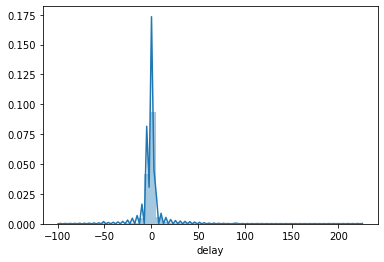

In [544]:
sns.distplot(y_df_train)

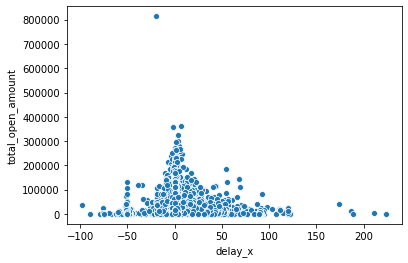

In [545]:
sns.scatterplot(data=df_train.merge(y_df_train,on = df_train.index), x="delay_x", y="total_open_amount")

## Feature Selection

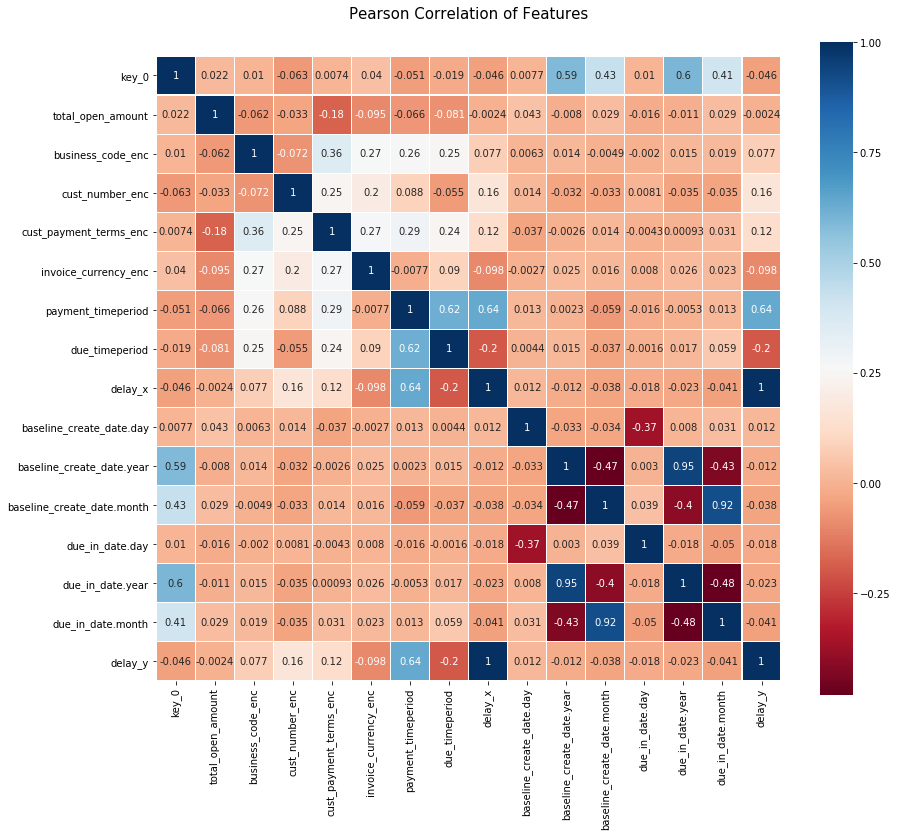

In [546]:
import  matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.merge(y_df_train , on = df_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [547]:
sel = VarianceThreshold(0.8)
sel.fit(df_train)

VarianceThreshold(threshold=0.8)

In [548]:
sel.variances_

array([1.26117570e+09, 2.53135660e-01, 4.25889074e+04, 1.08872292e+02,
       1.57233764e-02, 1.78514649e+02, 1.09721304e+02, 1.13761679e+02,
       7.79604761e+01, 1.16127682e-01, 1.22910424e+01, 7.66677673e+01,
       1.19369779e-01, 1.21339346e+01])

In [551]:
df_train.head()

,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,invoice_currency_enc,payment_timeperiod,due_timeperiod,delay,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month
0,1673.00,0,289,5,0,64,10,54,19,2018,11,29,2018,11
1,1264.96,1,718,34,1,11,15,-4,30,2018,12,14,2019,1
2,48157.20,1,666,20,1,23,15,8,30,2018,12,14,2019,1
3,45317.28,1,718,34,1,10,15,-5,30,2018,12,14,2019,1
4,45728.21,1,718,34,1,10,15,-5,30,2018,12,14,2019,1


In [552]:
#Select features on basis of 'Pearson correlation Features':
x_df_train = df_train.drop(columns = ['delay','invoice_currency_enc','due_timeperiod','payment_timeperiod'], axis = 1)
x_df_test = df_test.drop(columns = ['delay','invoice_currency_enc','due_timeperiod','payment_timeperiod'], axis = 1)

#### Split 'x_df_test' and 'y_df_test' dataset into two parts ('x_df_test_test','x_df_test_val') and ('y_df_test_test','y_df_test_val')

In [553]:
x_df_test_val,x_df_test_test,y_df_test_val,y_df_test_test = train_test_split(x_df_test,y_df_test,test_size=0.5,random_state=0 , shuffle = False)

In [554]:
x_df_train.shape, x_df_test_val.shape, x_df_test_test.shape

((25534, 10), (5868, 10), (5869, 10))

## Modelling

### create a base model

In [555]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_df_train, y_df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [556]:
x_df_test_val.head()

,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month
0,27644.43,1,519,28,30,2018,12,14,2019,1
1,52526.97,1,519,28,30,2018,12,14,2019,1
2,53.25,1,440,15,30,2018,12,14,2019,1
3,14149.92,1,500,28,30,2018,12,14,2019,1
4,14723.39,1,519,28,30,2018,12,14,2019,1


In [557]:
x_df_test_val.shape

(5868, 10)

In [558]:
y_predict = base_model.predict(x_df_test_val)

In [658]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms= sqrt(mean_squared_error(y_df_test_val, y_predict))
rms

12.013831164457535

### Tree based model

In [562]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [563]:
regressor.fit(x_df_train, y_df_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [564]:
y_predict2 = regressor.predict(x_df_test_val)

In [661]:
rms = sqrt(mean_squared_error(y_df_test_val, y_predict2))
rms

13.242656948625216

## Feature Engineering on  'Test' dataset

In [613]:
Test.shape

(9711, 18)

In [614]:
Test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5,U001,0200148860,DOLLA trust,NaN,2020.0,1.930759e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,NaN,67314.01,20200408.0,NAA8,1.930759e+09,1
12,U001,0200956366,RICH trust,NaN,2020.0,1.930651e+09,2020-03-16,20200313,20200316,20200331.0,USD,RV,NaN,40494.96,20200316.0,NAA8,1.930651e+09,1
16,U001,0200759878,SA,NaN,2020.0,1.930749e+09,2020-04-05,20200404,20200405,20200420.0,USD,RV,NaN,13789.99,20200405.0,NAH4,1.930749e+09,1
17,U001,0200726979,BJ'S systems,NaN,2020.0,1.930829e+09,2020-04-27,20200426,20200427,20200512.0,USD,RV,NaN,142.89,20200427.0,NAA8,1.930829e+09,1
24,U001,0200726979,BJ'S llc,NaN,2020.0,1.930689e+09,2020-03-24,20200323,20200324,20200408.0,USD,RV,NaN,612.24,20200324.0,NAA8,1.930689e+09,1


In [615]:
#Label Encoding of 'business_code'
business_code_encoder = LabelEncoder()
business_code_encoder.fit(Test['business_code'])
Test['business_code_enc'] = business_code_encoder.transform(Test['business_code'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [616]:
#Label Encoding of 'cust_number'
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(Test['cust_number'])
Test['cust_number_enc'] = cust_number_encoder.transform(Test['cust_number'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [617]:
#Label Encoding of 'invoice_currency'
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(Test['invoice_currency'])
Test['invoice_currency_enc'] = invoice_currency_encoder.transform(Test['invoice_currency'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [618]:
#Label Encoding of 'buisness_year'
buisness_year_encoder = LabelEncoder()
buisness_year_encoder.fit(Test['buisness_year'])
Test['buisness_year_enc'] = buisness_year_encoder.transform(Test['buisness_year'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [619]:
#Label Encoding of 'cust_payment'
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(Test['cust_payment_terms'])
Test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(Test['cust_payment_terms'])

C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [620]:
#drop label Encoded features
drop_list = ['buisness_year','cust_number','cust_payment_terms','invoice_currency','business_code']
Test = Test.drop(columns = drop_list, axis = 1)

In [621]:
st = ''
Test['baseline_create_date'] = pd.Series(Test['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
Test['due_in_date'] = pd.Series(Test['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
Test['document_create_date.1'] = pd.Series(Test['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [622]:
for col in date_list:
    Test[col] = pd.to_datetime(Test[col],format='%Y-%m-%d')
Test.shape

(9711, 18)

In [623]:
for col1 in ['baseline_create_date','due_in_date']:
    Test['{}.day'.format(col1)] = Test[col1].dt.day
    Test['{}.year'.format(col1)] = Test[col1].dt.year
    Test['{}.month'.format(col1)] = Test[col1].dt.month
    Test['{}.day'.format(col1)] = Test[col1].dt.day
    Test['{}.year'.format(col1)] = Test[col1].dt.year
    Test['{}.month'.format(col1)] = Test[col1].dt.month

In [624]:
Test['due_timeperiod'] = pd.Series(Test['due_in_date'] - Test['baseline_create_date']).dt.days

In [625]:
Test.shape

(9711, 25)

In [626]:
Test.head()

,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,business_code_enc,cust_number_enc,invoice_currency_enc,buisness_year_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,due_timeperiod
5,DOLLA trust,NaT,1.930759e+09,2020-04-08,20200407,2020-04-08,2020-04-23,RV,NaN,67314.01,2020-04-08,1.930759e+09,1,1,205,1,0,12,8,2020,4,23,2020,4,15
12,RICH trust,NaT,1.930651e+09,2020-03-16,20200313,2020-03-16,2020-03-31,RV,NaN,40494.96,2020-03-16,1.930651e+09,1,1,503,1,0,12,16,2020,3,31,2020,3,15
16,SA,NaT,1.930749e+09,2020-04-05,20200404,2020-04-05,2020-04-20,RV,NaN,13789.99,2020-04-05,1.930749e+09,1,1,396,1,0,26,5,2020,4,20,2020,4,15
17,BJ'S systems,NaT,1.930829e+09,2020-04-27,20200426,2020-04-27,2020-05-12,RV,NaN,142.89,2020-04-27,1.930829e+09,1,1,336,1,0,12,27,2020,4,12,2020,5,15
24,BJ'S llc,NaT,1.930689e+09,2020-03-24,20200323,2020-03-24,2020-04-08,RV,NaN,612.24,2020-03-24,1.930689e+09,1,1,336,1,0,12,24,2020,3,8,2020,4,15


In [628]:
#Store original 'Test' for further use 
original_Test = Test.copy()

In [629]:
drop_lists = ['name_customer','clear_date','doc_id','document_create_date.1','posting_date','document_create_date','due_in_date','document type','area_business','isOpen','baseline_create_date','invoice_id','invoice_currency_enc','buisness_year_enc','due_timeperiod']
Test = Test.drop(columns = drop_lists, axis = 1)

In [630]:
Test.head()

,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month
5,67314.01,1,205,12,8,2020,4,23,2020,4
12,40494.96,1,503,12,16,2020,3,31,2020,3
16,13789.99,1,396,26,5,2020,4,20,2020,4
17,142.89,1,336,12,27,2020,4,12,2020,5
24,612.24,1,336,12,24,2020,3,8,2020,4


In [631]:
Test.shape

(9711, 10)

In [633]:
x_df_test_val.shape

(5868, 10)

### Final Prediction

In [634]:
final_result = regressor.predict(Test)

In [635]:
final_result = pd.Series(final_result,name='delay')

#### Merging Final result with original Test dataset

In [636]:
original_Test.reset_index(drop = True, inplace = True)

In [638]:
Final = original_Test.merge(final_result, on = original_Test.index )
Final

,key_0,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,business_code_enc,cust_number_enc,invoice_currency_enc,buisness_year_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,due_timeperiod,delay
0,0,DOLLA trust,NaT,1.930759e+09,2020-04-08,20200407,2020-04-08,2020-04-23,RV,NaN,67314.01,2020-04-08,1.930759e+09,1,1,205,1,0,12,8,2020,4,23,2020,4,15,0.889655
1,1,RICH trust,NaT,1.930651e+09,2020-03-16,20200313,2020-03-16,2020-03-31,RV,NaN,40494.96,2020-03-16,1.930651e+09,1,1,503,1,0,12,16,2020,3,31,2020,3,15,0.889655
2,2,SA,NaT,1.930749e+09,2020-04-05,20200404,2020-04-05,2020-04-20,RV,NaN,13789.99,2020-04-05,1.930749e+09,1,1,396,1,0,26,5,2020,4,20,2020,4,15,0.889655
3,3,BJ'S systems,NaT,1.930829e+09,2020-04-27,20200426,2020-04-27,2020-05-12,RV,NaN,142.89,2020-04-27,1.930829e+09,1,1,336,1,0,12,27,2020,4,12,2020,5,15,0.889655
4,4,BJ'S llc,NaT,1.930689e+09,2020-03-24,20200323,2020-03-24,2020-04-08,RV,NaN,612.24,2020-03-24,1.930689e+09,1,1,336,1,0,12,24,2020,3,8,2020,4,15,0.889655
5,5,WAL-MAR trust,NaT,1.930718e+09,2020-03-31,20200329,2020-03-31,2020-04-15,RV,NaN,39218.39,2020-03-31,1.930718e+09,1,1,411,1,0,26,31,2020,3,15,2020,4,15,0.889655
6,6,SA associates,NaT,1.930682e+09,2020-03-22,20200320,2020-03-22,2020-04-06,RV,NaN,26843.36,2020-03-22,1.930682e+09,1,1,396,1,0,26,22,2020,3,6,2020,4,15,0.889655
7,7,BJ'S,NaT,1.930629e+09,2020-03-07,20200310,2020-03-07,2020-03-22,RV,NaN,810.02,2020-03-07,1.930629e+09,1,1,336,1,0,12,7,2020,3,22,2020,3,15,0.889655
8,8,WAKE,NaT,1.930862e+09,2020-05-06,20200506,2020-05-06,2020-05-21,RV,NaN,42320.49,2020-05-06,1.930862e+09,1,1,583,1,0,12,6,2020,5,21,2020,5,15,0.889655
9,9,WAL-MAR trust,NaT,1.930694e+09,2020-03-26,20200325,2020-03-26,2020-04-10,RV,NaN,13775.74,2020-03-26,1.930694e+09,1,1,411,1,0,26,26,2020,3,10,2020,4,15,0.889655


#### Merging Final result with feature Engineered Test dataset

In [639]:
Test.reset_index(drop = True, inplace = True)

In [640]:
Final2 = Test.merge(final_result, on = Test.index )
Final2

,key_0,total_open_amount,business_code_enc,cust_number_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,delay
0,0,67314.01,1,205,12,8,2020,4,23,2020,4,0.889655
1,1,40494.96,1,503,12,16,2020,3,31,2020,3,0.889655
2,2,13789.99,1,396,26,5,2020,4,20,2020,4,0.889655
3,3,142.89,1,336,12,27,2020,4,12,2020,5,0.889655
4,4,612.24,1,336,12,24,2020,3,8,2020,4,0.889655
5,5,39218.39,1,411,26,31,2020,3,15,2020,4,0.889655
6,6,26843.36,1,396,26,22,2020,3,6,2020,4,0.889655
7,7,810.02,1,336,12,7,2020,3,22,2020,3,0.889655
8,8,42320.49,1,583,12,6,2020,5,21,2020,5,0.889655
9,9,13775.74,1,411,26,26,2020,3,10,2020,4,0.889655


## Bucketization

In [339]:
def delay_bucketization(x):
    if x<0:
        return('(< 0) Days')
    if 0 <= x and x < 15:
        return('(0-15) Days')
    elif 15 <= x and x < 30:
        return('(16-30) Days')
    elif 30 <= x and x < 45:
        return('(31-45) Days')
    elif 45 <= x and x < 60:
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [641]:
Final = Final.reset_index(drop=True)

Final['DELAY BUCKET(DAYS)']= pd.Series([delay_bucketization(x=Final['delay'][i])  for i in range(len(Final))])
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

Final['delay_bucket_id'] = Final['DELAY BUCKET(DAYS)'].map(bucket_mapper)

In [642]:
Final.head()

,key_0,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,business_code_enc,cust_number_enc,invoice_currency_enc,buisness_year_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,due_timeperiod,delay,DELAY BUCKET(DAYS),delay_bucket_id
0,0,DOLLA trust,NaT,1.930759e+09,2020-04-08,20200407,2020-04-08,2020-04-23,RV,NaN,67314.01,2020-04-08,1.930759e+09,1,1,205,1,0,12,8,2020,4,23,2020,4,15,0.889655,(0-15) Days,1
1,1,RICH trust,NaT,1.930651e+09,2020-03-16,20200313,2020-03-16,2020-03-31,RV,NaN,40494.96,2020-03-16,1.930651e+09,1,1,503,1,0,12,16,2020,3,31,2020,3,15,0.889655,(0-15) Days,1
2,2,SA,NaT,1.930749e+09,2020-04-05,20200404,2020-04-05,2020-04-20,RV,NaN,13789.99,2020-04-05,1.930749e+09,1,1,396,1,0,26,5,2020,4,20,2020,4,15,0.889655,(0-15) Days,1
3,3,BJ'S systems,NaT,1.930829e+09,2020-04-27,20200426,2020-04-27,2020-05-12,RV,NaN,142.89,2020-04-27,1.930829e+09,1,1,336,1,0,12,27,2020,4,12,2020,5,15,0.889655,(0-15) Days,1
4,4,BJ'S llc,NaT,1.930689e+09,2020-03-24,20200323,2020-03-24,2020-04-08,RV,NaN,612.24,2020-03-24,1.930689e+09,1,1,336,1,0,12,24,2020,3,8,2020,4,15,0.889655,(0-15) Days,1


In [646]:
def payment_date_cal(dates, delays):
    final_date = dates + pd.Timedelta(days=int(delays))
    return pd.to_datetime(dates)

In [647]:
Final['Predicted Payment Date'] = pd.Series([payment_date_cal(dates = Final['due_in_date'][i], delays = Final['delay'][i]) for i in range(len(Final))])

In [648]:
# Setting to Display all the Columns as by default, we can't view all the columns
pd.set_option('display.max_columns', 256)


In [649]:
Final['DELAY BUCKET(DAYS)'].unique()

array(['(0-15) Days', '(< 0) Days', '(> 60) Days', '(31-45) Days'],
      dtype=object)

In [651]:
Final.head()

,key_0,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen,business_code_enc,cust_number_enc,invoice_currency_enc,buisness_year_enc,cust_payment_terms_enc,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,due_timeperiod,delay,DELAY BUCKET(DAYS),delay_bucket_id,Predicted Payment Date
0,0,DOLLA trust,NaT,1.930759e+09,2020-04-08,20200407,2020-04-08,2020-04-23,RV,NaN,67314.01,2020-04-08,1.930759e+09,1,1,205,1,0,12,8,2020,4,23,2020,4,15,0.889655,(0-15) Days,1,2020-04-23
1,1,RICH trust,NaT,1.930651e+09,2020-03-16,20200313,2020-03-16,2020-03-31,RV,NaN,40494.96,2020-03-16,1.930651e+09,1,1,503,1,0,12,16,2020,3,31,2020,3,15,0.889655,(0-15) Days,1,2020-03-31
2,2,SA,NaT,1.930749e+09,2020-04-05,20200404,2020-04-05,2020-04-20,RV,NaN,13789.99,2020-04-05,1.930749e+09,1,1,396,1,0,26,5,2020,4,20,2020,4,15,0.889655,(0-15) Days,1,2020-04-20
3,3,BJ'S systems,NaT,1.930829e+09,2020-04-27,20200426,2020-04-27,2020-05-12,RV,NaN,142.89,2020-04-27,1.930829e+09,1,1,336,1,0,12,27,2020,4,12,2020,5,15,0.889655,(0-15) Days,1,2020-05-12
4,4,BJ'S llc,NaT,1.930689e+09,2020-03-24,20200323,2020-03-24,2020-04-08,RV,NaN,612.24,2020-03-24,1.930689e+09,1,1,336,1,0,12,24,2020,3,8,2020,4,15,0.889655,(0-15) Days,1,2020-04-08


In [653]:
Final['Predicted Payment Date']

0      2020-04-23
1      2020-03-31
2      2020-04-20
3      2020-05-12
4      2020-04-08
5      2020-04-15
6      2020-04-06
7      2020-03-22
8      2020-05-21
9      2020-04-10
10     2020-03-15
11     2020-04-27
12     2020-05-15
13     2020-04-09
14     2020-05-06
15     2020-04-03
16     2020-05-13
17     2020-05-20
18     2020-05-16
19     2020-03-21
20     2020-03-16
21     2020-03-28
22     2020-04-04
23     2020-05-16
24     2020-04-12
25     2020-05-09
26     2020-06-10
27     2020-03-23
28     2020-03-21
29     2020-04-28
          ...    
9681   2020-05-03
9682   2020-04-12
9683   2020-03-23
9684   2020-05-21
9685   2020-03-30
9686   2020-05-09
9687   2020-04-09
9688   2020-03-30
9689   2020-05-01
9690   2020-03-30
9691   2020-04-04
9692   2020-04-15
9693   2020-03-25
9694   2020-04-15
9695   2020-05-16
9696   2020-05-16
9697   2020-04-23
9698   2020-04-08
9699   2020-03-25
9700   2020-04-22
9701   2020-03-16
9702   2020-04-24
9703   2020-04-24
9704   2020-05-07
9705   202

#### ----- End ---